In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from market import IntegratedMarketModel

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
n_firms = 10 
n_consumers = 10000
n_chars = 2
T = 1
s = 100

In [4]:
model = IntegratedMarketModel(
        n_firms, 
        n_consumers, 
        n_chars, 
        T, 
        seed=s
    )
model.demand_side_optimisation()


In [5]:
vp1 = model.v_p[:,0]
print(vp1.shape)
price1 = model.prices[:,0]

e=0 


market_shares, all_probs, mean_indirect_utility = model.compute_share(vp1, price1, e)
J_true = model.construct_Jacobian(all_probs, vp1)
print(J_true)
print(all_probs)

(10000,)
[[-9.16175544e-04  1.38133866e-06  1.57100291e-06  1.67188241e-06
   1.98911194e-06  1.42106668e-06  1.41129427e-06  1.53987156e-06
   1.36726320e-06  1.73121209e-06]
 [ 1.38133866e-06 -8.26754645e-04  1.27296577e-06  1.36141461e-06
   1.61059643e-06  1.15815947e-06  1.14289967e-06  1.25410893e-06
   1.11495835e-06  1.40429475e-06]
 [ 1.57100291e-06  1.27296577e-06 -8.32266717e-04  1.54209201e-06
   1.83625700e-06  1.31057978e-06  1.30281376e-06  1.42029682e-06
   1.26084912e-06  1.59774365e-06]
 [ 1.67188241e-06  1.36141461e-06  1.54209201e-06 -9.35955340e-04
   1.95198463e-06  1.39792182e-06  1.38502683e-06  1.51439850e-06
   1.34528566e-06  1.70003451e-06]
 [ 1.98911194e-06  1.61059643e-06  1.83625700e-06  1.95198463e-06
  -1.04483690e-03  1.65882851e-06  1.64979694e-06  1.79779512e-06
   1.59581278e-06  2.02302245e-06]
 [ 1.42106668e-06  1.15815947e-06  1.31057978e-06  1.39792182e-06
   1.65882851e-06 -8.03365538e-04  1.17703385e-06  1.28763323e-06
   1.14397490e-06  1.444

In [6]:
vp2 = np.random.normal(0, 1, n_consumers)
J_approx = model.construct_Jacobian(all_probs, vp2)
print(J_approx)


J_true_flat = J_true.flatten()
J_approx_flat = J_approx.flatten()


# Compare the matrices element-wise with a tolerance of 0.2
comparison = np.allclose(J_true, J_approx, atol=1e-03)

# Print the result
if comparison:
    print("The matrices are approximately the same.")
else:
    print("The matrices are different.")


[[-1.15800988e-03  1.98494773e-06  2.29226264e-06  2.42253801e-06
   2.90527794e-06  2.05664995e-06  2.06090033e-06  2.23077854e-06
   1.97716638e-06  2.52218359e-06]
 [ 1.98494773e-06 -1.02267151e-03  1.83312250e-06  1.94606003e-06
   2.32182743e-06  1.65342091e-06  1.64723944e-06  1.79226604e-06
   1.59036630e-06  2.01897588e-06]
 [ 2.29226264e-06  1.83312250e-06 -1.05543187e-03  2.23906800e-06
   2.68733230e-06  1.90066849e-06  1.90625957e-06  2.06178830e-06
   1.82706722e-06  2.33240197e-06]
 [ 2.42253801e-06  1.94606003e-06  2.23906800e-06 -1.17349729e-03
   2.83716591e-06  2.01287374e-06  2.01268310e-06  2.18277845e-06
   1.93546439e-06  2.46455439e-06]
 [ 2.90527794e-06  2.32182743e-06  2.68733230e-06  2.83716591e-06
  -1.32710786e-03  2.40823139e-06  2.41638089e-06  2.61250383e-06
   2.31488189e-06  2.95622215e-06]
 [ 2.05664995e-06  1.65342091e-06  1.90066849e-06  2.01287374e-06
   2.40823139e-06 -1.00533639e-03  1.70841765e-06  1.85366080e-06
   1.64380940e-06  2.09226128e-06

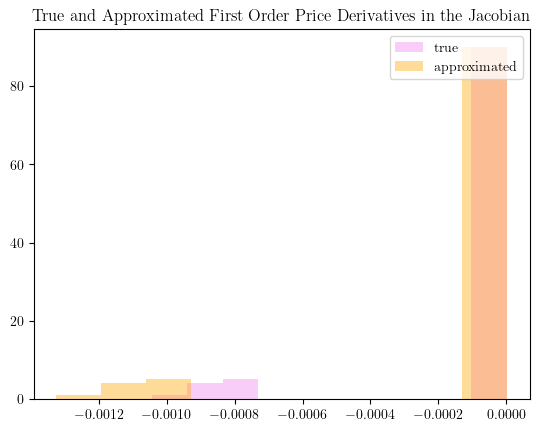

In [7]:
plt.hist(J_true_flat, 
         bins=10,
         alpha=0.4, 
         label='true',
         color='violet') # customized color parameter
  
plt.hist(J_approx_flat,
         bins=10, 
         alpha=0.4,
         label='approximated',
         color='orange')

plt.title('True and Approximated First Order Price Derivatives in the Jacobian')
plt.legend(loc='upper right')
plt.show()

In [8]:
wage = 15 
theta_0 = 1
theta_L = 0.3 
theta_K = 0.7
q= np.ones(2)

productivity_shocks = np.ones((2,2))
capital = np.ones((2,2))

t = 0

MC = (wage*(1/theta_L))*((q)/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))**((1/theta_L)-1) *(1/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))

print(MC)

[0.06363169 0.06363169]


In [9]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.shape)

(2, 3)


In [10]:
n_cons = 3
n_firms = 3
product_chars = np.array(([1, 3, 3], [1, 2, 2], [5, 5, 5]))
mu = -4
omega = 0.5
v_p = np.array([4, 5, 6])
price = np.ones(n_firms)
beta = np.array([1, 0.5, 0.5])

mean_indirect_utility = product_chars@beta - mu*price

mean_indirect_utility_for_utility = np.repeat(mean_indirect_utility, n_cons, axis=0)

price_r = np.reshape(price, (1, n_firms))
alpha_i = np.reshape((omega*v_p), (n_cons, 1))



random_coeff = np.ravel((alpha_i@price_r).T)



u = mean_indirect_utility_for_utility  + random_coeff + e
print(u)

u_r = np.reshape(u, (n_firms, n_cons))
print(u_r)
sum_u = np.sum(np.exp(u_r), axis=0)
print(sum_u)

all_probs = np.exp(u_r)/(1 + sum_u)
print(all_probs)
market_shares = (np.sum(all_probs, axis=1))/n_cons
# # market_shares = np.sum(all_probs, axis=1)/self.n_consumers
p1 = all_probs[0, :]
print(p1)



[10.  10.5 11.   9.   9.5 10.  16.  16.5 17. ]
[[10.  10.5 11. ]
 [ 9.   9.5 10. ]
 [16.  16.5 17. ]]
[ 8916240.07023025 14700394.65845743 24236853.3610853 ]
[[2.47037576e-03 2.47037587e-03 2.47037593e-03]
 [9.08800453e-04 9.08800494e-04 9.08800518e-04]
 [9.96620712e-01 9.96620756e-01 9.96620782e-01]]
[0.00247038 0.00247038 0.00247038]


In [11]:
J = np.zeros((n_firms, n_firms))
alphas = mu + omega*v_p
print(alphas)
print(all_probs)
for i in range(J.shape[0]):
    print('i', i)
    p1 = all_probs[i, :]
    for j in range(J.shape[1]):
        print('j', j)
        if i == j:
            J[i, j] = np.sum(alphas * p1 - alphas * (p1 ** 2))/(n_cons)
        else: 
            p2 = all_probs[j, :]
            print(p1)
            print(p2)
            print('check shape', -alphas * p1 * p2 )
            J[i, j] = np.sum((-alphas * p1 * p2))/(n_cons)

print(J)


[-2.  -1.5 -1. ]
[[2.47037576e-03 2.47037587e-03 2.47037593e-03]
 [9.08800453e-04 9.08800494e-04 9.08800518e-04]
 [9.96620712e-01 9.96620756e-01 9.96620782e-01]]
i 0
j 0
j 1
[0.00247038 0.00247038 0.00247038]
[0.0009088 0.0009088 0.0009088]
check shape [4.49015722e-06 3.36761821e-06 2.24507893e-06]
j 2
[0.00247038 0.00247038 0.00247038]
[0.99662071 0.99662076 0.99662078]
check shape [0.00492406 0.00369304 0.00246203]
i 1
j 0
[0.0009088 0.0009088 0.0009088]
[0.00247038 0.00247038 0.00247038]
check shape [4.49015722e-06 3.36761821e-06 2.24507893e-06]
j 1
j 2
[0.0009088 0.0009088 0.0009088]
[0.99662071 0.99662076 0.99662078]
check shape [0.00181146 0.00135859 0.00090573]
i 2
j 0
[0.99662071 0.99662076 0.99662078]
[0.00247038 0.00247038 0.00247038]
check shape [0.00492406 0.00369304 0.00246203]
j 1
[0.99662071 0.99662076 0.99662078]
[0.0009088 0.0009088 0.0009088]
check shape [0.00181146 0.00135859 0.00090573]
j 2
[[-3.69640962e-03  3.36761812e-06  3.69304169e-03]
 [ 3.36761812e-06 -1.3619

In [12]:
a1, a2, a0, s0 = model.get_alphas()
print(a0)
print(s0)

-1.6820276496988864
0.33979778797685584


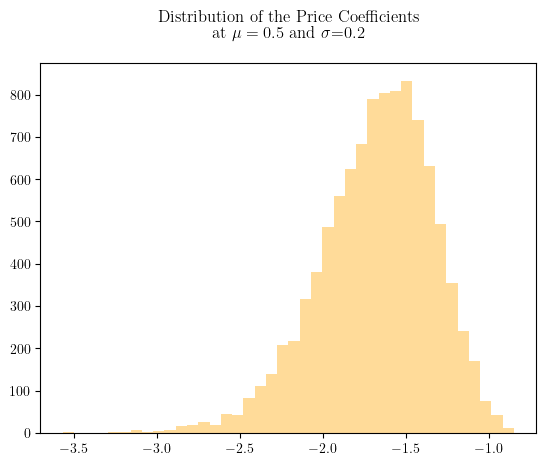

In [13]:
# plt.hist(a1, 
#          bins=10,
#          alpha=0.4, 
#          label='true',
#          color='violet') # customized color parameter
  
plt.hist(a2,
         bins=40, 
         alpha=0.4,
        #  label='Price Coeffi',
         color='orange')

plt.title('Distribution of the Price Coefficients \n at $\mu = 0.5$ and $\sigma$=0.2 \n')
# plt.legend(loc='upper right')
plt.show()